In [1]:
import numpy as np

In [2]:
import cv2 as cv
import pytesseract 
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import math

In [5]:
def showImage(imageForShowing):
    plt.figure(figsize = (10, 10))
    plt.imshow(imageForShowing, 'gray')

In [6]:
def showColorImage(imageForShowing):
    plt.figure(figsize = (10, 10))
    plt.imshow(imageForShowing)

In [7]:
def showImages(image1, image2):
    f = plt.figure(figsize = (10, 10))
    f.add_subplot(1, 1, 1)
    plt.imshow(image1, 'gray')
    f.add_subplot(1, 1, 1)
    plt.imshow(image2, 'gray')
    plt.show(block=True)

In [8]:
img = cv.imread("visit.jpg", 0)

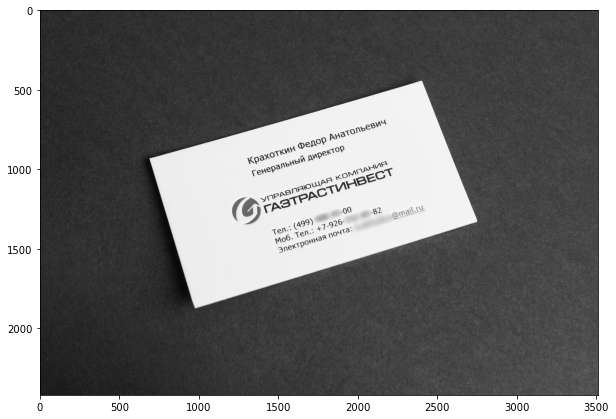

In [14]:
showImage(img)

In [11]:
imageShape = img.shape
print(imageShape)

(2419, 3510)


In [12]:
def CreateHisto(image):
    r = 256
    histogramData = np.zeros(r, np.uint16)
    for i in range(imageShape[0]):
        for j in range(imageShape[1]):
            index = int(image[i, j])
            histogramData[index] = histogramData[index] + 1
    return histogramData / (imageShape[0] * imageShape[1])

<BarContainer object of 256 artists>

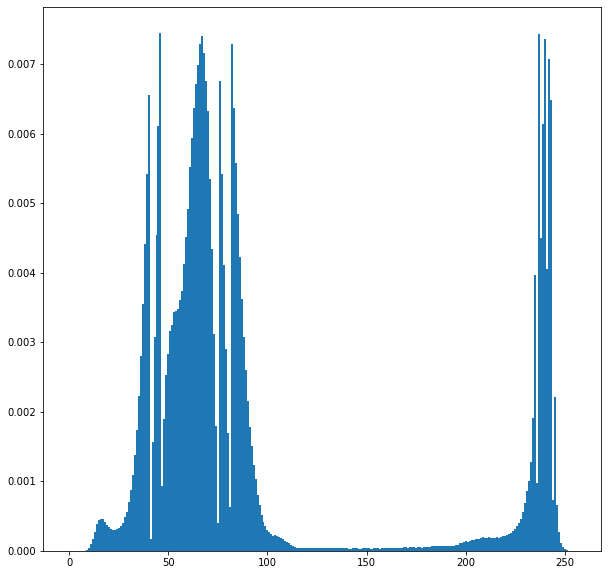

In [13]:
histoOfOriginal = CreateHisto(img)
plt.figure(figsize = (10, 10))
plt.bar(range(256), histoOfOriginal, 1)

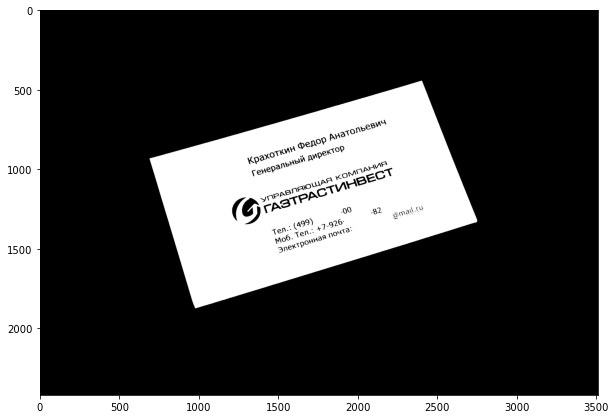

In [49]:
threshold, thresholdedImage = cv.threshold(img, 150, 255, cv.THRESH_BINARY)
showImage(thresholdedImage)

In [50]:
contours, hierarchy = cv.findContours(thresholdedImage, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [55]:
print(len(contours))

249


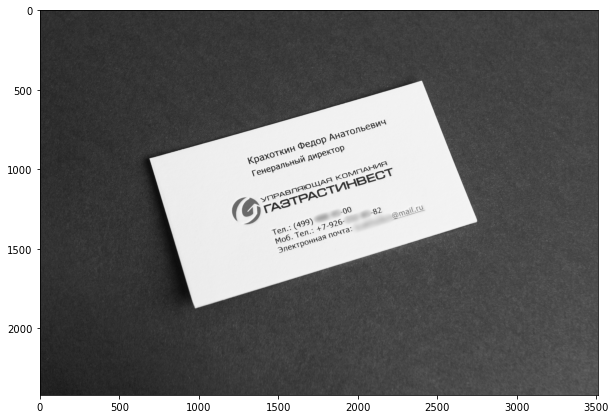

In [61]:
colorImage = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
showColorImage(colorImage)

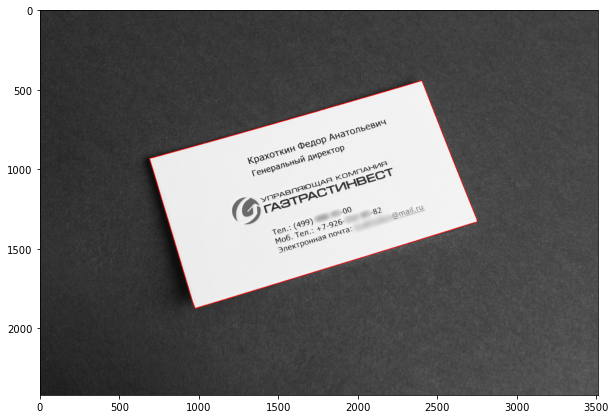

In [73]:
imageWithContours = cv.drawContours(colorImage.copy(), contours, 3, (255, 0, 0), 3)
showColorImage(imageWithContours)

In [69]:
print(hierarchy)

[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [ -1   2   4  -1]
  [  5  -1  -1   3]
  [  6   4  -1   3]
  [  8   5   7   3]
  [ -1  -1  -1   6]
  [  9   6  -1   3]
  [ 10   8  -1   3]
  [ 12   9  11   3]
  [ -1  -1  -1  10]
  [ 14  10  13   3]
  [ -1  -1  -1  12]
  [ 15  12  -1   3]
  [ 16  14  -1   3]
  [ 17  15  -1   3]
  [ 19  16  18   3]
  [ -1  -1  -1  17]
  [ 20  17  -1   3]
  [ 22  19  21   3]
  [ -1  -1  -1  20]
  [ 24  20  23   3]
  [ -1  -1  -1  22]
  [ 26  22  25   3]
  [ -1  -1  -1  24]
  [ 27  24  -1   3]
  [ 28  26  -1   3]
  [ 29  27  -1   3]
  [ 31  28  30   3]
  [ -1  -1  -1  29]
  [ 33  29  32   3]
  [ -1  -1  -1  31]
  [ 34  31  -1   3]
  [ 35  33  -1   3]
  [ 36  34  -1   3]
  [ 37  35  -1   3]
  [ 38  36  -1   3]
  [ 39  37  -1   3]
  [ 41  38  40   3]
  [ -1  -1  -1  39]
  [ 42  39  -1   3]
  [ 43  41  -1   3]
  [ 44  42  -1   3]
  [ 46  43  45   3]
  [ -1  -1  -1  44]
  [ 47  44  -1   3]
  [ 48  46  -1   3]
  [ 49  47  -1   3]
  [ 50  48  -1   3]


In [74]:
print(contours[3])

[[[2398  444]]

 [[2397  445]]

 [[2394  445]]

 ...

 [[2403  448]]

 [[2403  446]]

 [[2401  444]]]


In [83]:
print(contours)

[array([[[2640,  904]],

       [[2640,  905]]], dtype=int32), array([[[2590,  812]]], dtype=int32), array([[[3233,  769]]], dtype=int32), array([[[2398,  444]],

       [[2397,  445]],

       [[2394,  445]],

       ...,

       [[2403,  448]],

       [[2403,  446]],

       [[2401,  444]]], dtype=int32), array([[[1506, 1489]],

       [[1507, 1488]],

       [[1513, 1488]],

       [[1514, 1489]],

       [[1516, 1489]],

       [[1517, 1490]],

       [[1518, 1490]],

       [[1519, 1491]],

       [[1520, 1491]],

       [[1522, 1493]],

       [[1522, 1494]],

       [[1524, 1496]],

       [[1524, 1497]],

       [[1525, 1498]],

       [[1525, 1499]],

       [[1526, 1500]],

       [[1526, 1502]],

       [[1527, 1503]],

       [[1527, 1504]],

       [[1528, 1505]],

       [[1528, 1510]],

       [[1527, 1511]],

       [[1527, 1514]],

       [[1526, 1515]],

       [[1526, 1516]],

       [[1521, 1521]],

       [[1520, 1521]],

       [[1518, 1523]],

       [[1517, 152

In [85]:
perimeter = cv.arcLength(contours[3], True)
oneContour = cv.approxPolyDP(contours[3], 0.02 * perimeter, True)
array = []
array.append(oneContour)
print(array)
print(oneContour)

[array([[[2401,  444]],

       [[ 689,  933]],

       [[ 976, 1873]],

       [[2745, 1333]]], dtype=int32)]
[[[2401  444]]

 [[ 689  933]]

 [[ 976 1873]]

 [[2745 1333]]]


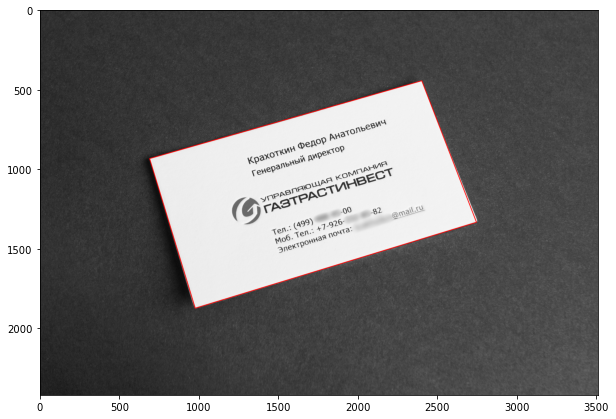

In [86]:
imageWithContours = cv.drawContours(colorImage.copy(), array, -1, (255, 0, 0), 3)
showColorImage(imageWithContours)

In [28]:
contours, hierarchy = cv.findContours(invThresholdedImage, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
print(len(contours))

26


In [29]:
print(contours)

[array([[[334, 669]],

       [[333, 670]],

       [[333, 671]],

       [[332, 672]],

       [[332, 673]],

       [[332, 674]],

       [[331, 675]],

       [[331, 676]],

       [[330, 677]],

       [[330, 678]],

       [[329, 679]],

       [[329, 680]],

       [[328, 681]],

       [[328, 682]],

       [[328, 683]],

       [[327, 684]],

       [[327, 685]],

       [[326, 686]],

       [[326, 687]],

       [[325, 688]],

       [[325, 689]],

       [[324, 690]],

       [[324, 691]],

       [[324, 692]],

       [[323, 693]],

       [[324, 693]],

       [[325, 694]],

       [[326, 694]],

       [[327, 695]],

       [[328, 695]],

       [[329, 695]],

       [[330, 696]],

       [[331, 696]],

       [[332, 695]],

       [[333, 694]],

       [[333, 693]],

       [[334, 692]],

       [[335, 691]],

       [[335, 690]],

       [[336, 689]],

       [[337, 688]],

       [[337, 687]],

       [[338, 686]],

       [[339, 685]],

       [[340, 684]],

       [[

In [30]:
setOfCroppedImages = []
setOfLeftRectangles = []
colorImage4 = cv.cvtColor(img, cv.COLOR_BGR2RGB)  
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    setOfLeftRectangles.append([x, y, w, h])
    cv.rectangle(colorImage4, (x, y), (x + w, y + h), color=(255, 0, 0), thickness=1) 
    setOfCroppedImages.append(invThresholdedImage[y: y + h, x: x + w])

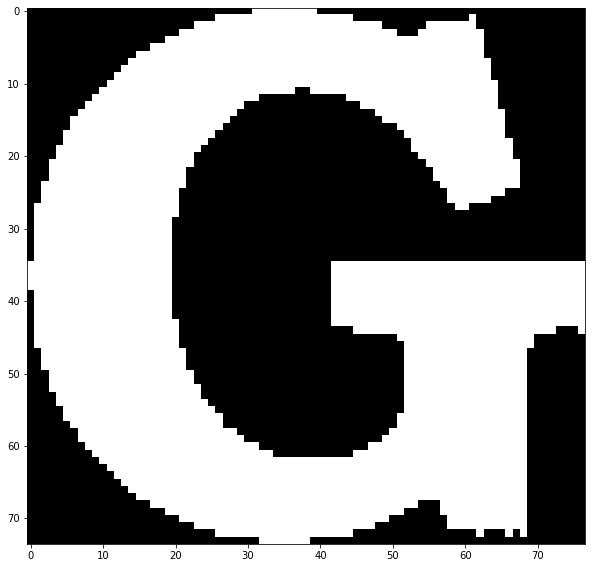

In [31]:
showImage(setOfCroppedImages[21])

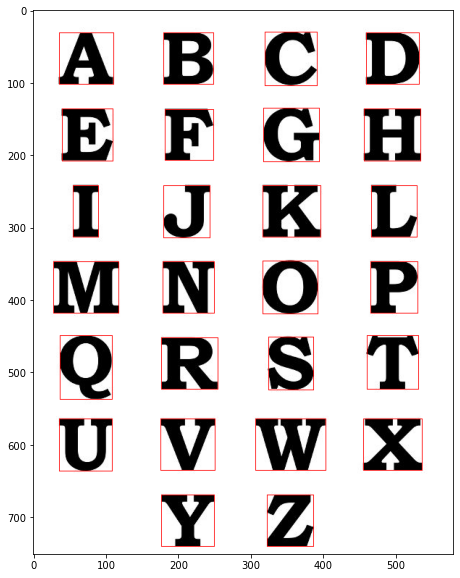

In [32]:
showColorImage(colorImage4)

In [33]:
print(len(contours))

26


In [34]:
def SortContours(r):
    rectangles = r.copy()    
    for i in range(len(rectangles) - 1):
        for j in range(len(rectangles) - 1):
            if rectangles[j][1] + rectangles[j][3] > rectangles[j + 1][1] + rectangles[j + 1][3] and abs(rectangles[j][1] + rectangles[j][3] - rectangles[j + 1][1] + rectangles[j + 1][3]) > 10:
                temp = rectangles[j]
                rectangles[j] = rectangles[j + 1]
                rectangles[j + 1] = temp
   # for i in range(len(rectangles) - 1):
    #    for j in range(len(rectangles) - 1):
     #       if abs(rectangles[j][1] + rectangles[j][3] - rectangles[j + 1][1] + rectangles[j + 1][3]) < 10 and rectangles[j][0] > rectangles[j + 1][0]:
      #          temp = rectangles[j]
       #         rectangles[j] = rectangles[j + 1]
        #        rectangles[j + 1] = temp
    return rectangles

In [35]:
sortedRectangles = SortContours(setOfLeftRectangles)

<ipython-input-5-53d23ba05121>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 10))


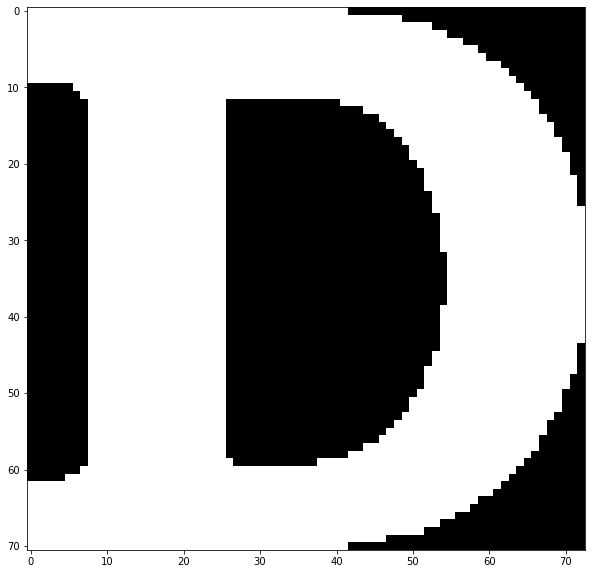

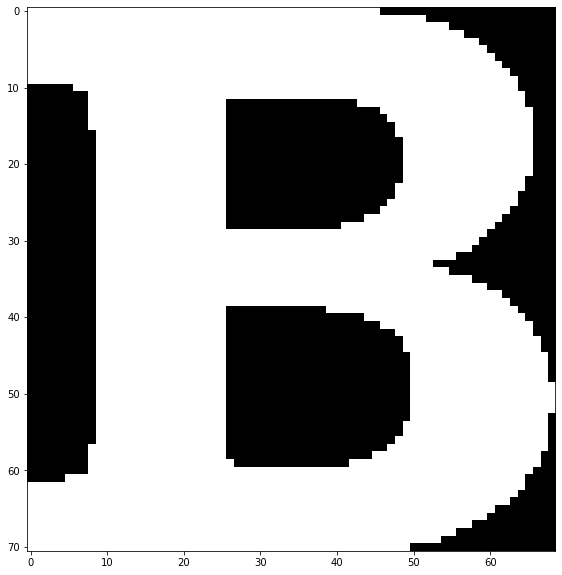

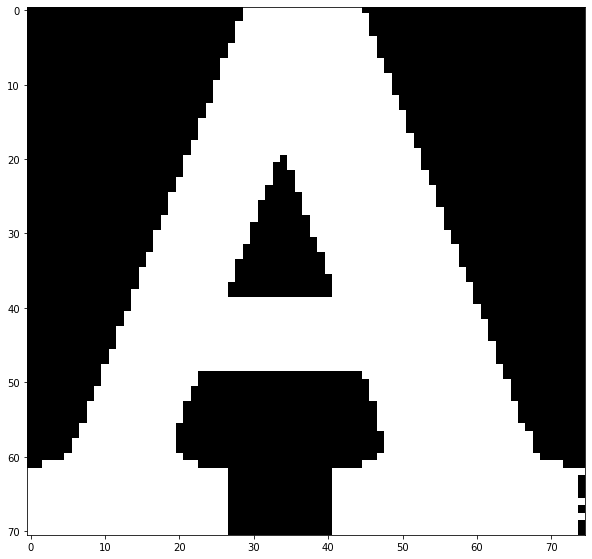

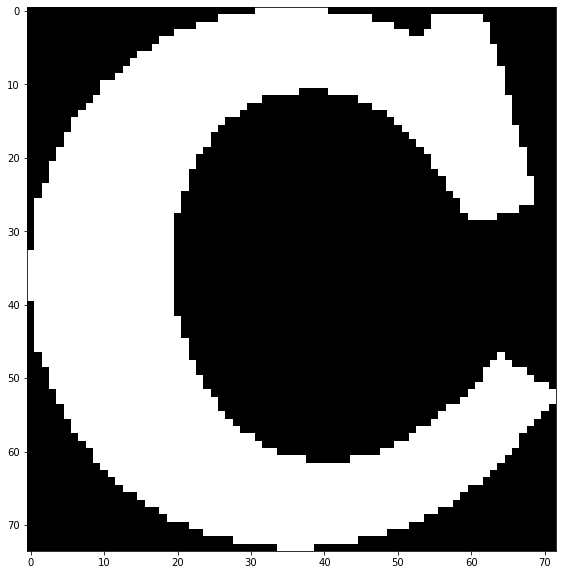

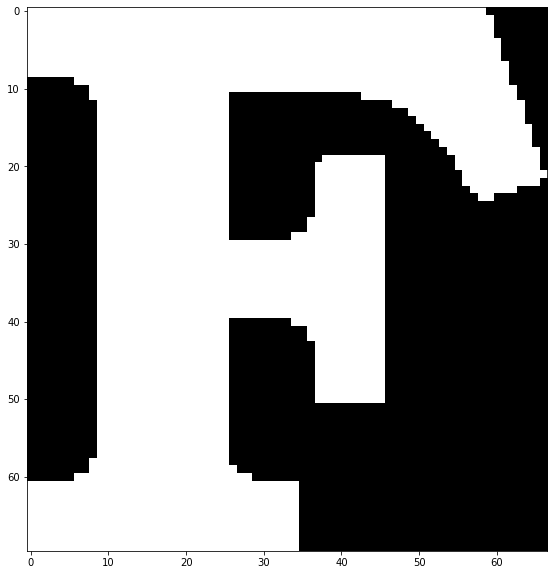

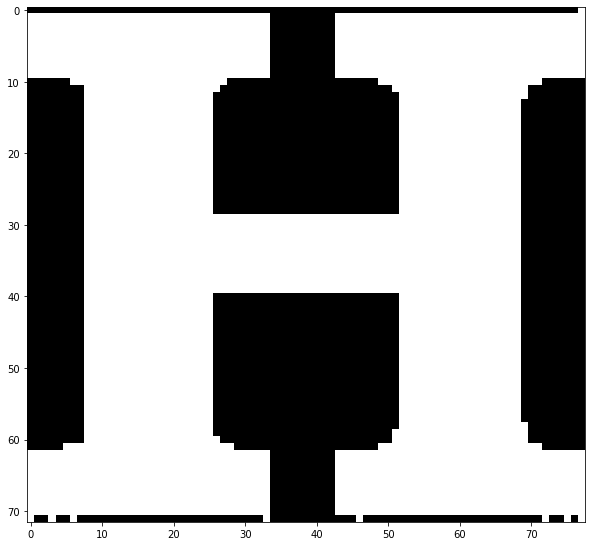

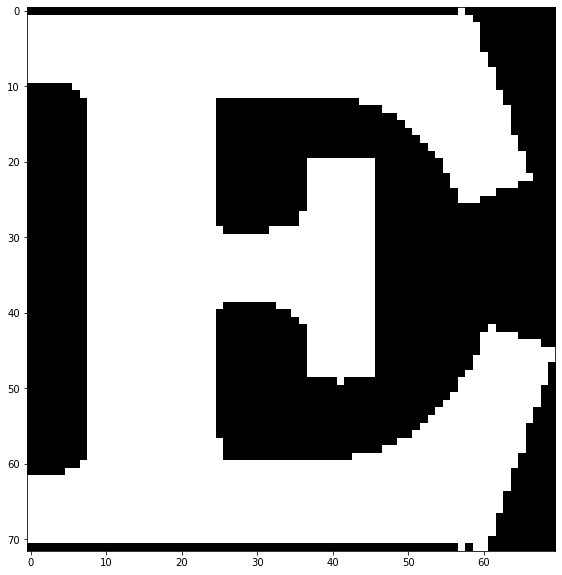

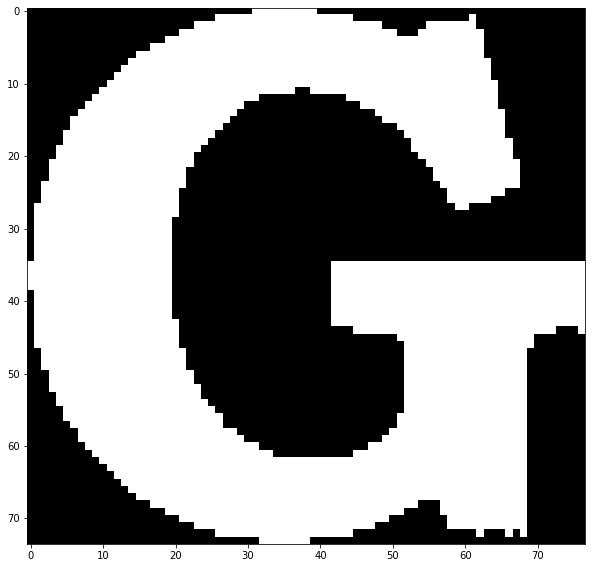

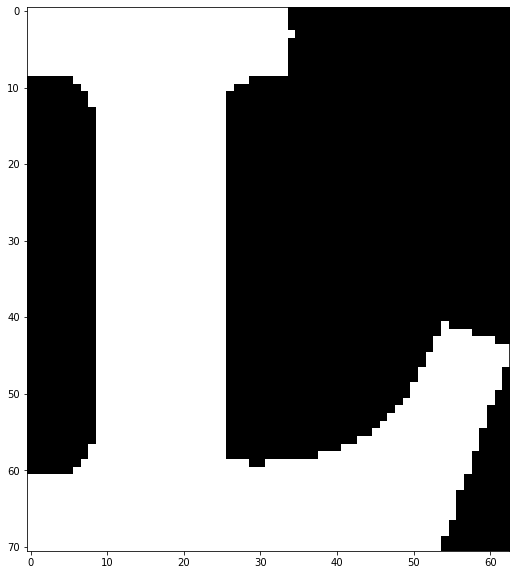

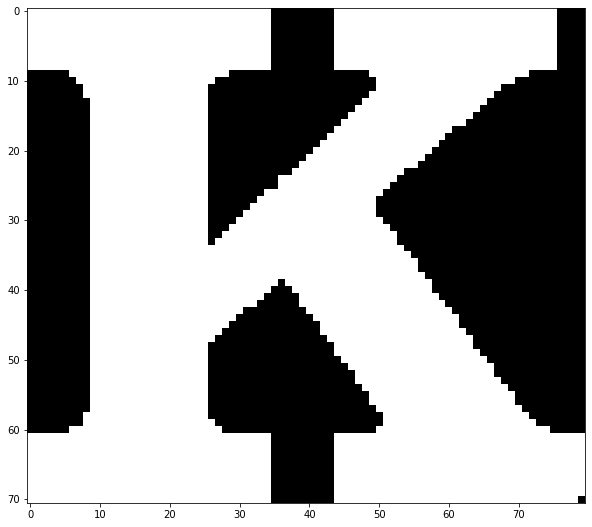

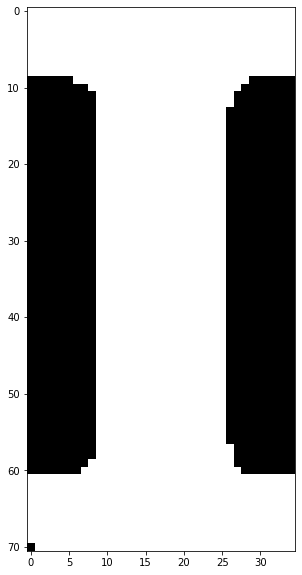

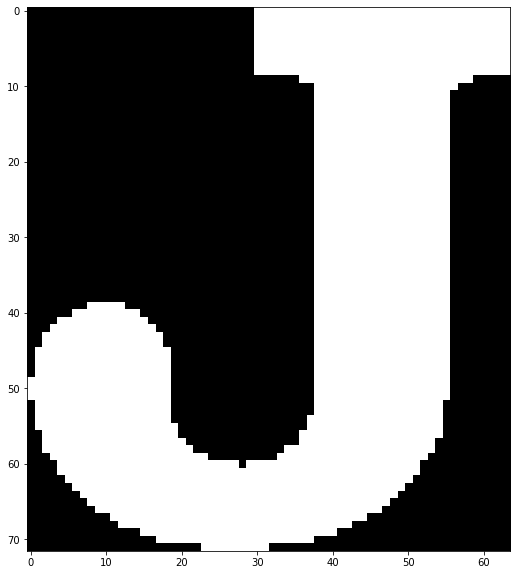

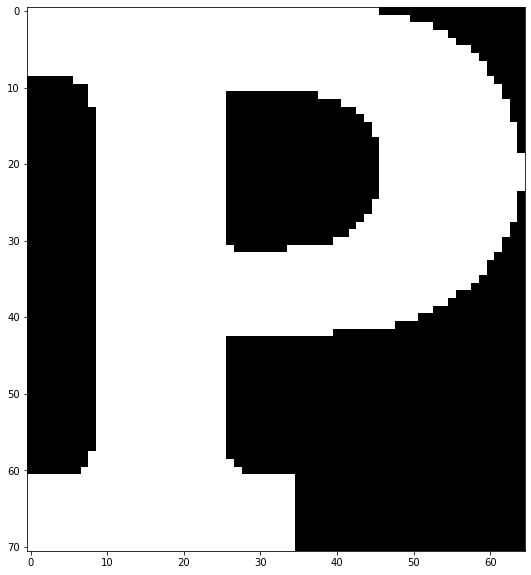

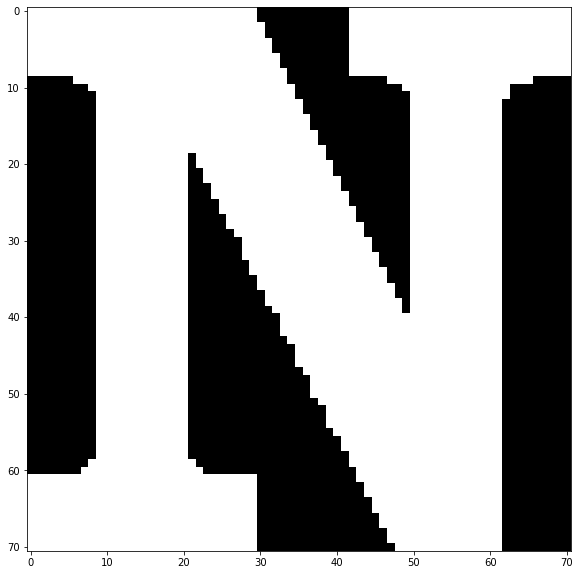

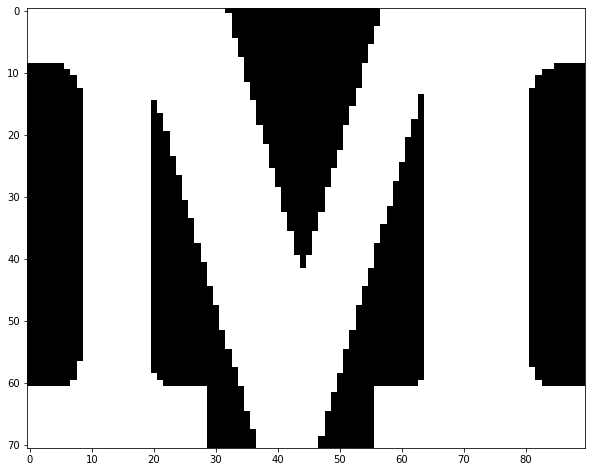

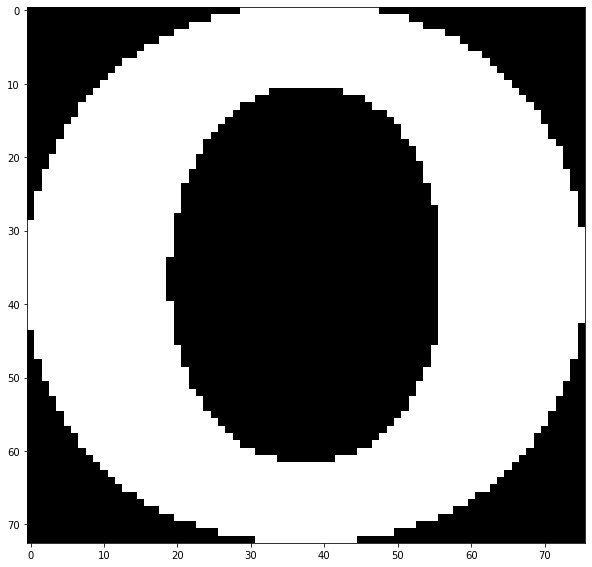

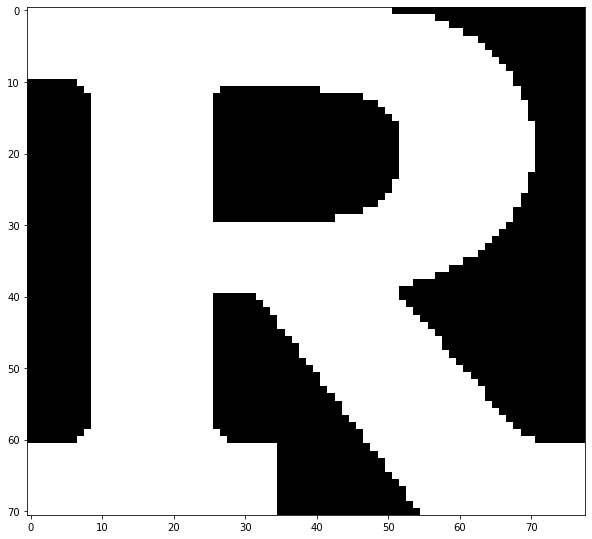

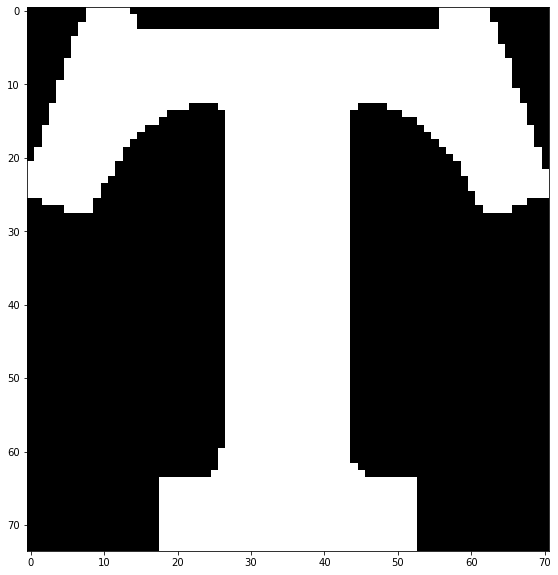

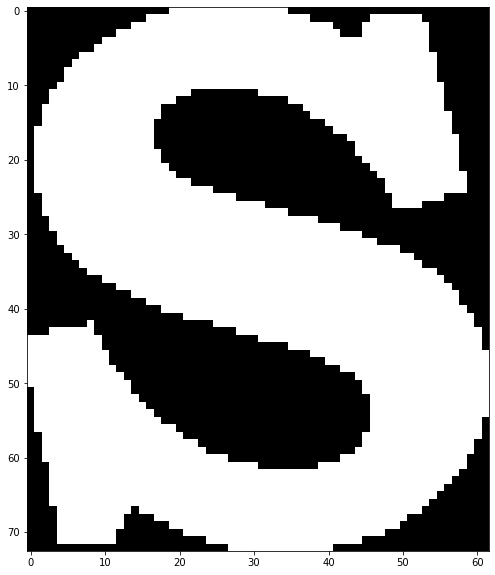

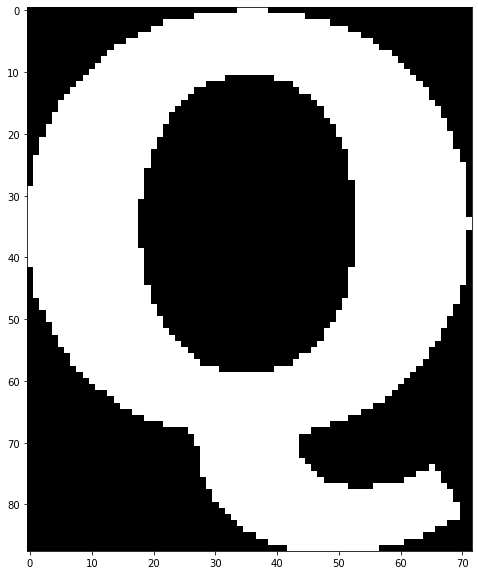

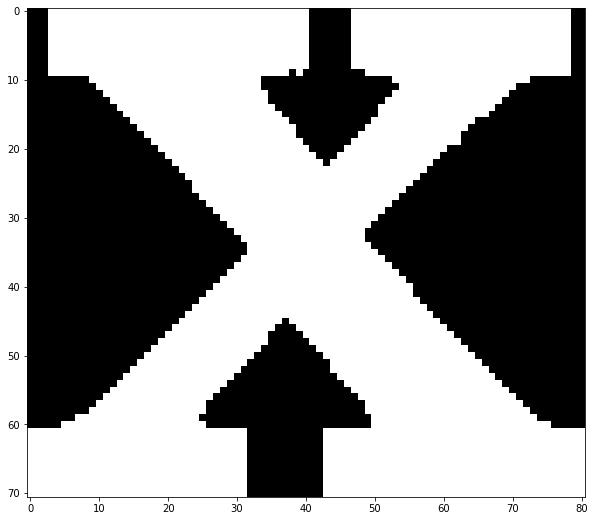

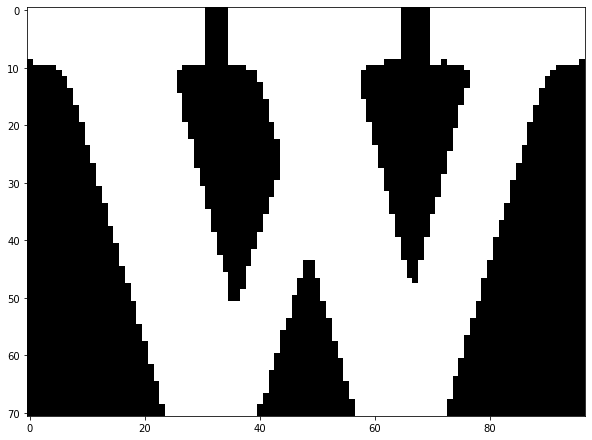

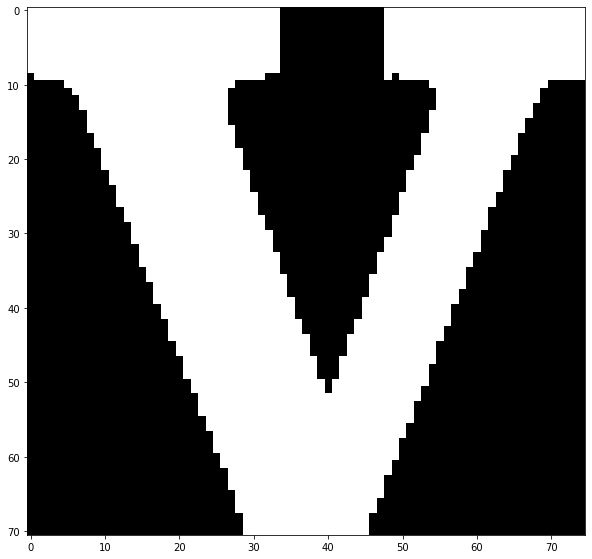

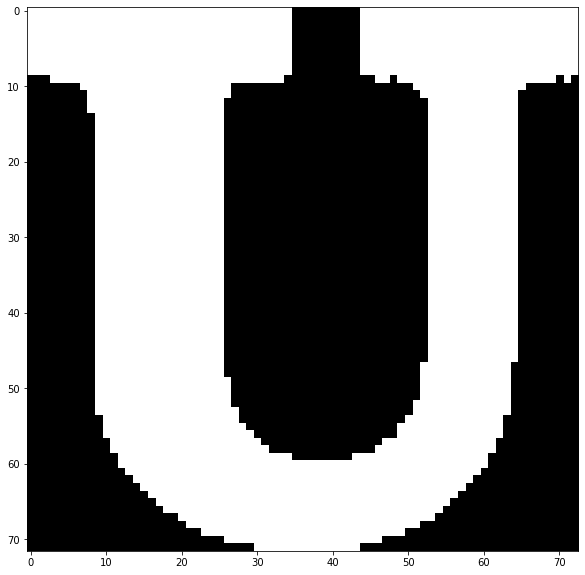

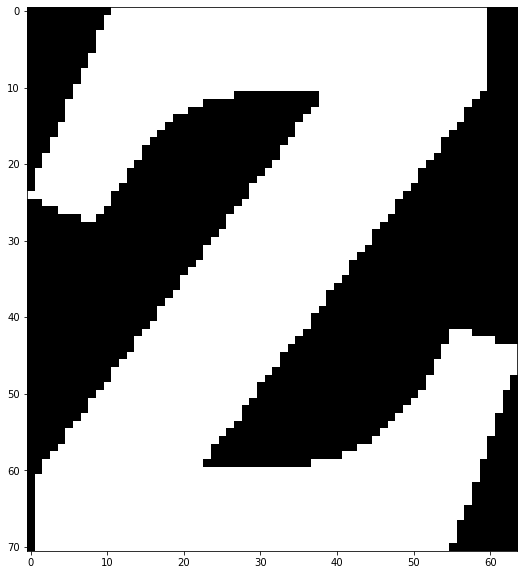

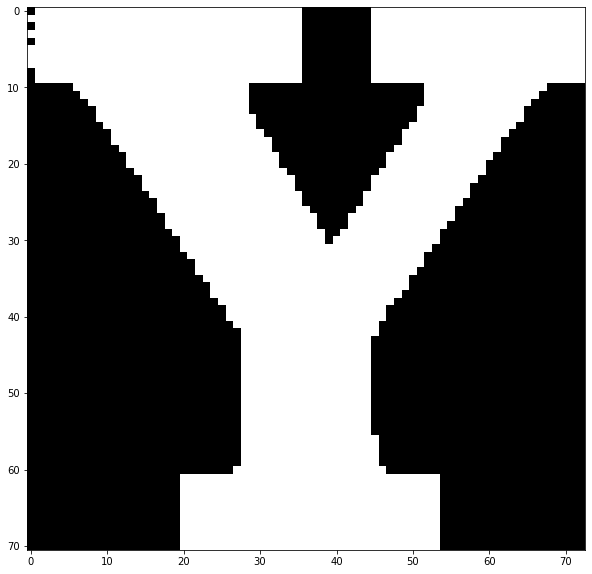

In [36]:
for rec in sortedRectangles:
    x = rec[0]
    y = rec[1]
    w = rec[2]
    h = rec[3]
    croppedLetter = invThresholdedImage[y: y + h, x: x + w]
    showImage(croppedLetter)

In [37]:
print(pytesseract.image_to_string(invThresholdedImage, lang = 'eng'))

ee aa
OhOR-tela-a.
oe
to or


In [38]:
image2 = cv.imread('4.jpg')

In [39]:
grayImage2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

In [40]:
print(pytesseract.image_to_string(grayImage2, lang = 'rus'))

Моржи

Моржи живут в морях Северного
Ледовитого океана. Это очень
большие животные. С виду моржи
неуклюжи. Но они могут быть очень
проворными. Моржи ищут для себя
поживу на дне моря. Их пища —
рачки, черви. Моржи часто
устраивают лежбища на льдинах.
